# --BREAKING NEWS - CONFIRM MODEL!--


In [1]:
import pathlib
from tensorflow.keras.applications import vgg19
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Se till att detta pekar på ditt egna val-bibliotek

In [2]:
val_no_dataset  = pathlib.Path(r"C:\Users\AndreasP\Desktop\StudieGrupp3_MLProjekt\data\processed\2_split_no\val")
val_yes_dataset = pathlib.Path(r"C:\Users\AndreasP\Desktop\StudieGrupp3_MLProjekt\data\processed\2_split_yes\val")


In [3]:
p = val_no_dataset.glob('*/')
file_paths = [x for x in p if x.is_file()]
img_lst = []
lbl_lst = []
for pic in file_paths:
    img = cv2.imread(str(pic))
    img_lst.append(img)
    lbl_lst.append(1)

p = val_yes_dataset.glob('*/')
file_paths = [x for x in p if x.is_file()]
for pic in file_paths:
    img = cv2.imread(str(pic))
    img_lst.append(img)
    lbl_lst.append(0)

In [4]:
data= np.array(img_lst).reshape(-1,224,224,3)

# OBS! Av lathet har jag inte bytt namn. Så bry er inte om att det står X_test

In [5]:
images = vgg19.preprocess_input(data) 
X_test = images
y_test = lbl_lst

# Peka på golden model!

In [6]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\AndreasP\Desktop\StudieGrupp3_MLProjekt\notebooks\modelling\model_checkpoint\first_golden_model.h5')

## Skapar rapport på modellen

              precision    recall  f1-score   support

         YES       0.92      1.00      0.96        24
          NO       1.00      0.89      0.94        18

    accuracy                           0.95        42
   macro avg       0.96      0.94      0.95        42
weighted avg       0.96      0.95      0.95        42



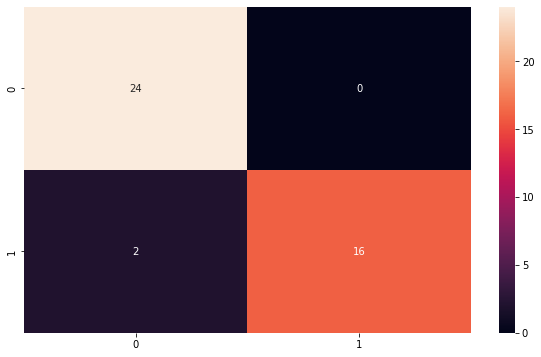

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
original_list=["YES", "NO"]


y_pred1 = model.predict(X_test)
y_pred =[1 if pred >.5 else 0 for pred in y_pred1]       # eftersom vi använder binary
y_pred = np.array(y_pred).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred, target_names = original_list))